## Summarize the centriole compensation

Required input:

For the midline: a list of X_coordinate and a list of Y_coordinate

For the edge: a list of X_coordinate and a list of Y_coordinate

For the centriole: a list of list containing [X_coordinate, Y_coordinate, an angle (in degrees)]

In [1]:
import import_ipynb

from tools.Centriole_Characteristic import *
from tools.Extract_Experiment_Characteristic import *
from tools.CNN_Tools import *

importing Jupyter notebook from C:\Users\Equipe_Azimzadeh\Desktop\Planarians\tools\Centriole_Characteristic.ipynb
importing Jupyter notebook from C:\Users\Equipe_Azimzadeh\Desktop\Planarians\tools\ToolBox.ipynb
importing Jupyter notebook from C:\Users\Equipe_Azimzadeh\Desktop\Planarians\tools\Midline_Edge_Reformater.ipynb
importing Jupyter notebook from C:\Users\Equipe_Azimzadeh\Desktop\Planarians\tools\Extract_Experiment_Characteristic.ipynb
importing Jupyter notebook from C:\Users\Equipe_Azimzadeh\Desktop\Planarians\tools\CNN_Tools.ipynb


In [2]:
path = './data_excel_example/150518_Smed-Unc22_Rootletin_100x-1(V3-2c).xlsm'

db = get_xls_values(path)

x_mid = db['worm_midline']['x']
y_mid = db['worm_midline']['y']
x_edg = db['worm_edge']['x']
y_edg = db['worm_edge']['y']

newY_mid, newY_edg = [], []
for y in y_mid:
    newY_mid.append(-y)
    
for y in y_edg:
    newY_edg.append(-y)

./data_excel_example/150518_Smed-Unc22_Rootletin_100x-1(V3-2c).xlsm


In [3]:
# From a midline and an edge, give as output
midline_final = aggregate_segment_char(x_mid, newY_mid, 
                                       x_edg, newY_edg, 
                                       n_midline_seg = 50, 
                                       n_sub_segment = 25, 
                                       n_edge_seg = 200)

In [4]:
import xlrd  

xls_name = "./data_excel_example/150518_Smed-Unc22_Rootletin_100x-1(V3-2c).xlsm"

with xlrd.open_workbook(xls_name) as xls_file:
    # Go to appropriate sheet (index 0)
    xls_sheet = xls_file.sheet_by_index(0)

a_list_of_centriole = []

pixel_size = db['image_pixel_size_in_um']
x_shift = db['image_shift']['x']
y_shift = db['image_shift']['y']

for row in range(xls_sheet.nrows - 7):
    if isinstance(xls_sheet.cell_value(row + 7, 3), (float, int)):
        X = xls_sheet.cell_value(row + 7, 3)/pixel_size + x_shift
        Y = -(xls_sheet.cell_value(row + 7, 4)/pixel_size + y_shift)
        angle = xls_sheet.cell_value(row + 7, 1)
        
        a_list_of_centriole.append(((X, Y), angle))

In [5]:
reoriented_centriole = []

for a_centriole in a_list_of_centriole:
    tmp_list = list(centriole_characterizator(a_centriole, midline_final))
    tmp_list.insert(1,a_centriole[0][0])
    tmp_list.insert(2,a_centriole[0][1])
    
    reoriented_centriole.append(tmp_list)


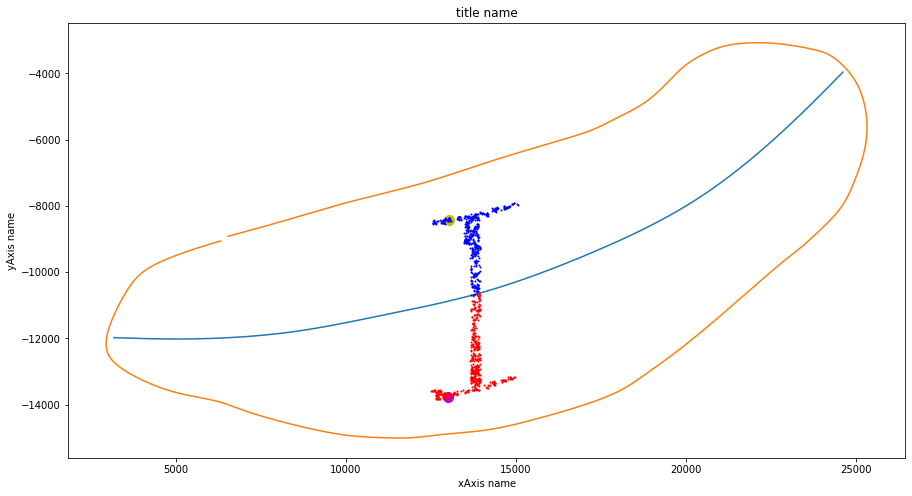

segment, X, Y, lateral_abs, longitudinal_abs, side, lateral_rel, longitudinal_rel, angle
[20, 13005.832558139535, -13768.666666666666, 2811.1222148242955, 9649.269879886448, 'right', 0.7093515071550447, 0.4075620464641218, 49.12726002133621]
[22, 13029.666666666666, -8423.832558139535, 2373.38463394108, 10600.630595552666, 'left', 0.6496551381703903, 0.44774524426344153, -25.832292458173544]


In [6]:
import matplotlib.pyplot as plt

i = 773
j = 940

X_coordinate = None
Y_coordinate = None

plt.figure(figsize=(15,8))
plt.plot(x_mid, newY_mid)
plt.plot(x_edg, newY_edg)
plt.plot(reoriented_centriole[i][1], reoriented_centriole[i][2], 'mo', markersize = 10)
plt.plot(reoriented_centriole[j][1], reoriented_centriole[j][2], 'yo', markersize = 10)

#plt.plot(X_coordinate, Y_coordinate, 'yo', markersize = 10)

for z in reoriented_centriole:
    if z[5] == 'left':
        plt.plot(z[1], z[2], 'bo', markersize = 1)
    else:
        plt.plot(z[1], z[2], 'ro', markersize = 1)

plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

print('segment, X, Y, lateral_abs, longitudinal_abs, side, lateral_rel, longitudinal_rel, angle')
print(reoriented_centriole[i])
print(reoriented_centriole[j])

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [7]:
results_count = np.zeros((5, 10))
results_angle_cos = np.zeros((5, 10))
results_angle_sin = np.zeros((5, 10))

results_angle = np.zeros((5, 10))

for ele in reoriented_centriole:
    if ele[5] == 'right':
        lat = -ele[6] + 1
    else:
        lat = ele[6] + 1
    
    lat_ = int(lat//0.2)
    long = int(ele[7] // 0.2)
    
    results_count[long][lat_] += 1
    results_angle_cos[long][lat_] += math.cos(math.radians(ele[8]))
    results_angle_sin[long][lat_] += math.sin(math.radians(ele[8]))

    results_angle[long][lat_] += ele[8]
    
# replace all the count = 0 by count = 1 to be able to compute the angle average
# since if count = 0, angle = 0 , the result is not affected BUT final table is false (0 should be replace by NAN)
results_count = np.reshape([1 if ele == 0 else ele for ele in  results_count.flatten()], (5, 10))

final_cos = results_angle_cos/results_count   
final_sin = results_angle_sin/results_count   
final = np.degrees(np.arctan2(final_sin, final_cos))



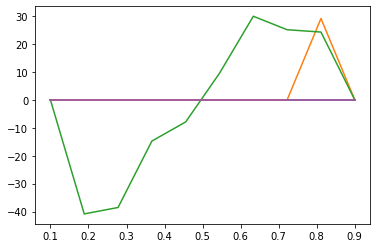

In [8]:
np.set_printoptions(precision=0)
for i  in final:
    plt.plot(np.linspace(0.9, 0.1, 10), i)
    
plt.show()

In [9]:
test = [-40, -30, Nan, ]

NameError: name 'Nan' is not defined